
# SYD DAT 6 Homework 2 - Visualisation, Regression and Classification

## Homework - Due Monday 14th November 2016

All responses should be written in markdown or code in this document.

----


# Homework reponses

### Setup

**Signup for an AWS account**

I have yet to signup as I initially found it challenging to do so. I will attempt again.

### Python Programming Skills

**Complete all the labs**



**Experiment with tutorials 1 & 2 from https://github.com/fonnesbeck/statistical-analysis-python-tutorial**

Completed, accept for the few exercices in the tutorials. I can see the similarities between Pandas operations and operations with dplyr/tidyr in R.

**Referring to the prior labs perform some simple analysis of the titanic.csv dataset using python**

**Load the data set titanic.csv**

In [2]:
import pandas as pd
import os

os.chdir('/Users/muhsinkarim/SYD_DAT_6/labs/Week 3/Logistic Regresison Lab')
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Produce 1 simple visualisation with matplotlib/seaborn/pandas visualisation libraries to show the distribution of ages**

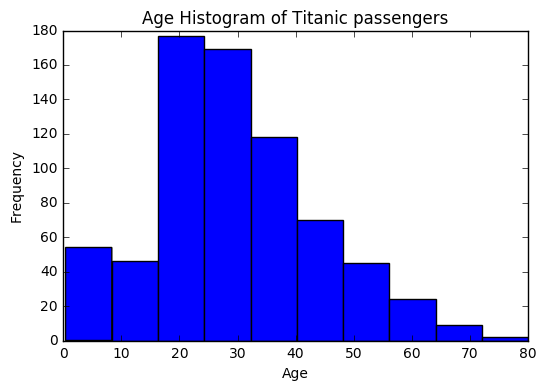

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## matplotlib
plt.hist(titanic.Age[~np.isnan(titanic.Age)])
plt.title("Age Histogram of Titanic passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**How many male 3rd class passengers survived and how many did not survive**

In [4]:
male_thirdclass = titanic[(titanic.Sex == 'male') & (titanic.Pclass == 3)]
#male_thirdclass.head()

bySurvived = male_thirdclass.groupby('Survived')
bySurvived['Survived'].describe()
# 47 survived, 300 did not survive.

Survived       
0         count    300.0
          mean       0.0
          std        0.0
          min        0.0
          25%        0.0
          50%        0.0
          75%        0.0
          max        0.0
1         count     47.0
          mean       1.0
          std        0.0
          min        1.0
          25%        1.0
          50%        1.0
          75%        1.0
          max        1.0
Name: Survived, dtype: float64

**How many female 1st class passengers survived and how many did not survive**

In [5]:
female_firstclass = titanic[(titanic.Sex == 'female') & (titanic.Pclass == 1)]
#female_firstclass.head()

bySurvived = female_firstclass.groupby('Survived')
bySurvived['Survived'].describe()
# 91 survived, 3 did not survive.

Survived       
0         count     3.0
          mean      0.0
          std       0.0
          min       0.0
          25%       0.0
          50%       0.0
          75%       0.0
          max       0.0
1         count    91.0
          mean      1.0
          std       0.0
          min       1.0
          25%       1.0
          50%       1.0
          75%       1.0
          max       1.0
Name: Survived, dtype: float64

**Produce a table grouped by class that shows:**

_Percent survived_

_Average fare_

In [6]:
### Percent survived
# http://stackoverflow.com/questions/29299078/pandas-very-simple-percent-of-total-size-from-group-by

byClass = titanic.groupby('Pclass')
#byClass['Survived'].describe()
dfClass = pd.DataFrame(byClass.size() * 100 / len(titanic))
dfClass.columns = ['Percent survived']
dfClass

,Percent survived
Pclass,
1,24.242424
2,20.650954
3,55.106622


In [7]:
### Average fare

dfFare = pd.DataFrame(byClass['Fare'].mean())
dfFare.columns = ['Average fare']
dfFare

,Average fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


### Machine Learning Theory
**Reading that was required during the course from Introduction to Statistical Learning**

_Chapter 3 - Linear Regression_

_Chapter 4 - 4.1, 4.2, 4.3  - Classification_

_Chapter 5 - 5.1 - Cross Validation_

_Chapter 6 - 6.1, 6.2, 6.3 - Dimensionality_


**Complete all the labs**


**Describe what technique you might apply to predict whether a person has AIDs. What could you do to reduce the probability that the solution mistakenly predicts that a person does not have AIDs, when in fact they do?**

A person either has AIDS or not. Since this is binary outcome, we can apply logistic regression.

A test may indicate a patient does not have AIDS yet does have AIDS (a false negative). To reduce the probability of a model making a false positive prediction, one can set a classification threshold. Once the model produces the predicted probabilities, a threshold can be set to optimise sensitivity, specificity and the false negative rate (note that the false negative rate is 1 minus true negative rate (specificity)). Viewing the area under an ROC curve allows visulisation of how different thresholds can affect model accuracy.

### Visualisation

**Drawing from Keegan from Optus' talk, your own experience or any other source, describe what you believe are the 3 most important considerations in producing a visualisation.**

1. The visualisation should speak for itself - if it requires extensive explanation, then it's too complicated. 
2. Bi mindful of the audience's expectations - a visualisation can help reinforce a known message or uncover insights that were previously unseen.
3. Depending on what is displayed, visualisations can convey stories and draw different conclusions. Additional layers of details, such as another branch of a decision tree will convey a different interpretation. 


**Name 3 types of plots you can think of to address each of the following situations:**

_Show the distribution of a single variable_

Histogram.
<br>
<br>

_Show a relationship between two variables_

Scatter plot.
<br>
<br>

_Compare two or more variables_

Scatter plot using a colour for the third variable, or use n X n scatter plots with each scatter plot displaying two of the variables at a time.

### Communication

**Imagine you are trying to explain to someone what Linear Regression is - but they have no programming/maths experience? How would you explain the overall process, what R-Squared means and how to interpret the coefficients?**

I have an answer, but it's long: http://probablyabetterway.blogspot.com.au/2016/11/what-is-linear-regression.html
<br>
<br>

**Read the paper [Useful things to know about machine learning]( https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf).**

_What have we covered so far from this paper?_
* Classification -  where discrete and/or continuous feature values  as inputs will outputs a single discrete value, such as email being spam.
* Classifiers need an evaluation function to distinguish between good classifiers from bad ones. We have covered...!!!!!!!!!!!!!
* Generalisation - we have discussed that models models should not overfit training data. Models should also factors in outliers when training, as it's possible that the model will encounter outliers in test datasets.
* Cross-validation - to avoid loss of training data, one can perform cross-validation which randomly divides training data into equal subsets (such as five), holding out each one while training on the rest.
* Bias and variance - Bias measures how far off the predicted values are from the real values, variance measures how much the predictons are from the actual values. The same dart-throwing analaogy is used as in class!

_Explain sections 6-13 in your own words_

Section 6<br>
Algorithms may not work quite so well in cases of high-dimensionality, that is, when there are more features. It's harder for models to generalise with more dimensions. With more irrelevant features the signal in the data is swamped by noise leading to random predictions by the model. Using an orange as a high-dimensional analogy, most of the mass of a multivariate Gaussian distribution is in the skin, not he pulp. To counter this, in most applications, data points are concentrated on or near a lower-dimensional space which learners can take advantage of. Alternatively, algorithms that reduce dimensionality can be applied.
<br>

Section 7<br>
A recent trend in machine learning is to have guarantees on the results of induction if we’re willing to settle for probabilistic guarantees. The main role of these guarantees should serve as a source of understanding and driving algorithm design. Alasdair, if you're reading this, I read the paper and didn't understand most of it but continued to make notes because I'm hoping that in a year's time I'll look back and it will all just click. 
<br>

Section 8<br>
The most important factors for machine learning project success are the features that are used. Little time is spent performing the actual machine learning. Rather, gathering, integrating, cleaning data and feature design form the time-consuming component of the project. Machine learning takes multiple iterations where the machine must learn from results of prior iterations.
<br>

Section 9<br>
To get a better classifier, one must either design better learning algorithms or gather more data. It’s better to simply get more data to improve a dumb algorithm. However with more training data the longer processing time occurs. It pays to apply simply learners first rather than more sophisticated learners. There are two types of learners; those whose representations have a fixed size (eg. Linear classifiers) and those whose representations can grow with the data (eg. Decision trees). Learners that save human effort and are understandable are the key considerations rather than CPU cycle bottlenecks.
<br>

Section 10<br>
Rather than stick with variations of a single favourite model or simply pick the best models from a variety, a better approach is to compare variations of learners. “Bagging” selects random variations of the training set, learns a classifier on each then combines the results by voting. “Boosting” uses training examples with weights – each new classifier focuses on the examples that the previous classifier got wrong. These approaches are part of ensemble modelling. Ensembles change the hypothesis space, such as from a single decision tree to a linear combination of trees.
<br>

Section 11<br>
Even if two classifiers have the same lowest training error, the simplest is often not the classifier with the lowest test error. Careful choice of codes to search hypothesis space influences the quality of the resulting classifier. For example, choosing sorter codes based on a preference reduces complexity and it may produce more general models. Some learners do not search hypothesis space exhaustively, and are less prone to overfitting data.
<br>

Section 12<br>
Even with an infinite amount of data, time and memory, learners can only learn a tiny subset of all possible functions. I'm gonna admit, I did not follow this section. Discovering methods to learn deeper representation is a major research frontier in machine learning.
<br>

Section 13<br>
The goal of learning predictive models is to use them as a guide to action. One can find an association between products purchased, but an experiment such as placing such items together in one shop and apart in another shop (or over different times of day) can determine if causality described by the correlation truly exists.

### Course Project

**Set up a new github repository for your project.**

I will be working with confidential work data for my projects and am unable to upload the data onto GitHub on either a public or private account.

I have created the following project repo to host sanitised outputs and reports from project work: https://github.com/muhsinkarim/ga_project
<br>


**Load the data you have gathered for your project into Python and run some summary statistics over the data. Are there any interesting features of the data that jump out? (Include the code)**

<br>
*Project 1*

I am continuing the latent dirichlet allocation project to create topics from customer feedback data. I have switched to R and am exploring different arguments such as customer stop words, using n-grams, etc.

<br>
*Project 2*

I have some data indicating if a customer made a future purchase. For each customer per row, a "0" indicated the customer did not have a future purchase. "1" indicated the customer did make a future purchase. Customers provided a rating of their shopping experience. I performed a logistic regression using "Rating" a single feature and "Future purchase" as the outcome. Appears to be working - the model predicted all customers in the test set would NOT make a future purchase, but that's only because most customers don't in my dataset. I'll start adding more features.

<br>
*Project 3*

I will build a decision tree exploring various features leading to a satisfaction score rating as the outcome. I would like to compare the decision tree model to other models that achieve the same outcome such as logistic regression or random forests.

<br>
*Project 4*

Perform clustering on trasnactions data to exmine whether staff are clustered based on sales features.
<br>

**Draft/Sketch on paper (or wireframe) some data visualisations that would be useful for you to explore your data set**

Pending! i need to scan my drawing.
<br>

**Are there any regression or clustering techniques you could use in your project? Write them down (with the corresponding scikit learn function) and what you think you would get out of it.**

Project 1: Latent Dirichlet Allocation.

Project 2: Logistic regression.

Project 3: Decision trees, then logistic regression and random forests.

Project 4: K-means clustering?